## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.22514696, -0.22832665],
       [ 1.41244449, -1.56586887],
       [ 0.80435647,  0.72671095],
       ...,
       [ 0.72017941, -1.70591229],
       [-0.87423138,  0.80487917],
       [-0.43162183,  2.16165739]], shape=(1000, 2))

In [5]:
y

array([-1.03618211e+01, -8.79377903e+01,  5.89422915e+01, -1.52491838e+01,
       -6.99092643e+01,  1.39958557e+02,  3.26222187e+01,  9.03247912e+01,
       -5.75413158e+01, -1.12365196e+02, -5.59304247e+00, -1.67220111e+01,
        4.96157842e+01, -8.23820499e+00,  4.80337931e+00,  1.07499735e+02,
       -5.70420053e+01, -3.72561745e+01, -4.78086642e+01, -4.79951090e+01,
        3.49813457e+00,  3.57938073e+01, -4.22266171e+01,  1.21422259e+02,
        8.17704143e+01,  1.89528743e+01, -5.23853183e+01,  1.15337543e+00,
        6.01414841e+01, -2.11609961e+01,  8.04832237e+01, -9.62624201e+01,
       -4.40055318e-01, -5.07470130e+01,  1.11112976e+02, -5.42644053e+01,
       -3.66234693e+01,  1.05751757e+02,  9.97278154e+01,  7.71431622e+00,
        2.63352973e+01,  1.32311460e+02,  8.34724703e+01, -4.58495527e+01,
        4.40878382e+00,  1.07666703e+02,  4.30238267e+00,  6.14124409e+01,
       -5.39994646e+00, -6.94730971e+01, -6.09968337e+01,  4.49976134e+01,
       -1.06096203e+02,  

In [6]:
pd.DataFrame(X)[0]

0      0.225147
1      1.412444
2      0.804356
3     -1.522065
4      0.421462
         ...   
995    1.106164
996    0.358720
997    0.720179
998   -0.874231
999   -0.431622
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

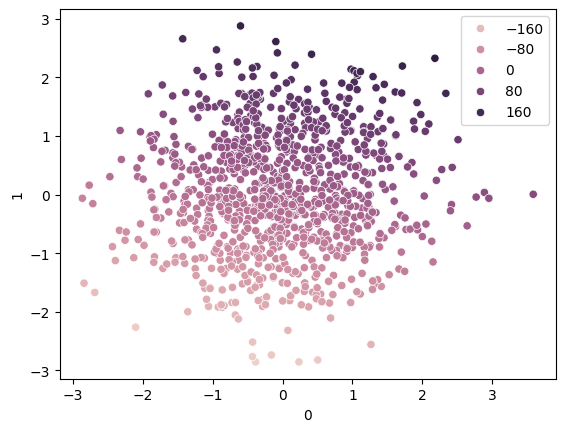

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[17.93980253, 66.95931716]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([  -8.55873564,   37.79447074,  139.88213275,  -35.09733338,
        158.18649262,   59.09226522,   53.03123699,   42.96082646,
        -21.48943947,  -50.53994581,   -6.66946683,  -23.6819491 ,
        -27.34121829,  -56.2038761 ,  123.86731739,   -7.33837019,
        -46.97397173,   96.50659038,   59.54079535,  -98.73823144,
         91.75082086,  -84.37133091, -146.67316576,   74.83355873,
        152.26784944,  -58.76317587,  -54.2223486 ,  -32.58241535,
         -7.11083883,  -42.08638438,   93.64901647,  177.78802843,
          7.87871712,  -18.53965772,  -19.5402604 ,  -31.3715336 ,
       -105.79667527, -108.91210322,  -81.39097078,   92.41447993,
        -20.14775108,   84.24679333,  -85.1625253 ,  -82.50539303,
        -85.25547145,   18.28030486,   54.68667483,    5.46563643,
        -13.0411576 , -121.48712011,    0.58893533,  126.22389212,
         75.84353913,   87.7218328 ,  -73.54661017,   83.9398051 ,
         -9.09670136,  -14.60347659,  146.19579576,  -37.44037

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9980921050462105


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.885 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.884 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9980969851654878
